In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"lines.linewidth": 2}, palette  = "deep", style = "ticks")
import matplotlib.pyplot as plt

In [121]:
model1="score"
model2="filter"
model3="multiply"
model4="score"

hvg_version = "sct"

p_value_cutoff=0.05
score_cutoff1=0.1
score_cutoff2=0.05
expression_form="SCT"
link_signal_1 = "all"
link_signal_2 = "nonnegative"

dataversion1 = "count"
dataversion2 = "norm"

gene_peak_1 = "500kb"
gene_peak_2 = "linkpeaks"

data = "bmmc"

data_version_1 = dataversion1+"_"+data+"_"+gene_peak_2+"_"+"motifmatchr_group1"
data_version_2 = dataversion1+"_"+data+"_"+gene_peak_2+"_"+"motifmatchr_group2"
data_version_3 = dataversion1+"_"+data+"_"+gene_peak_2+"_"+"motifmatchr"
data_version_4 = dataversion1+"_"+data+"_"+gene_peak_2+"_"+"motifmatchr"

directory = "/home/zc354/GRN/output/predicted_network/"

pred_path_1=directory+model1+'_'+hvg_version+'_'+data_version_1+'.csv'
pred_path_2=directory+model1+'_'+hvg_version+'_'+data_version_2+'.csv'
pred_path_3=directory+model3+'_'+hvg_version+'_'+data_version_1+'.csv'
pred_path_4=directory+model4+'_'+hvg_version+'_'+data_version_2+'.csv'
#pred_path_2=directory+model2+'_'+hvg_version+'_'+data_version+'.csv'

true_path='/gpfs/gibbs/pi/zhao/yw599/GRN/BEELINE-Networks/Networks/human/Non-specific-ChIP-seq-network.csv'

directed=False
save_path='/gpfs/gibbs/pi/zhao/zc354/GRN/output'

In [122]:
pred_path_1

'/home/zc354/GRN/output/predicted_network/score_sct_count_bmmc_linkpeaks_motifmatchr_group1.csv'

In [123]:
pred_path_2

'/home/zc354/GRN/output/predicted_network/score_sct_count_bmmc_linkpeaks_motifmatchr_group2.csv'

In [124]:
trueEdgesDF = pd.read_csv(true_path,sep = ',', header = 0, index_col = None)
predEdgesDF_1 = pd.read_csv(pred_path_1,sep = ',', header = 0, index_col = None)
predEdgesDF_2 = pd.read_csv(pred_path_2,sep = ',', header = 0, index_col = None)
predEdgesDF_3 = pd.read_csv(pred_path_3,sep = ',', header = 0, index_col = None)
predEdgesDF_4 = pd.read_csv(pred_path_4,sep = ',', header = 0, index_col = None)

In [125]:
def gen_df(EdgesDF = predEdgesDF_1, path='/gpfs/gibbs/pi/zhao/zc354/GRN/output/TF_filename.csv'):
    #Read true netword and predicted network
    #EdgesDF = pd.read_csv(path,sep = '\t', header = 0, index_col = None)

    #Unification changes lowercase letters to uppercase letters
    EdgesDF['Gene1'] = EdgesDF['Gene1'].str.upper()
    EdgesDF['Gene2'] = EdgesDF['Gene2'].str.upper()

    #Drop index in predEdgesDF that Edgeweight=0
    if 'Edgeweight' in EdgesDF.columns.values.tolist() :
        EdgesDF.drop(EdgesDF[EdgesDF['Edgeweight'] == 0].index,inplace=True)
        EdgesDF = EdgesDF.sort_values(by=['Edgeweight'],ascending=False)

    #Drop selfEdges
    EdgesDF = EdgesDF.loc[(EdgesDF['Gene1'] != EdgesDF['Gene2'])]

    #Drop duplicates in trueEdgesDF and predEdgesDF
    EdgesDF.drop_duplicates(keep = 'first', subset=['Gene1','Gene2'], inplace=True)
    
    #Generate a column to represent Edges
    EdgesDF['Edges'] = EdgesDF['Gene1'] + "|" + EdgesDF['Gene2']
    EdgesDF['reverseEdges'] = EdgesDF['Gene2'] + "|" + EdgesDF['Gene1']
    return EdgesDF

In [126]:
trueEdgesDF = gen_df(EdgesDF = trueEdgesDF,path = true_path)
predEdgesDF_1 = gen_df(EdgesDF = predEdgesDF_1,path = pred_path_1)
predEdgesDF_2 = gen_df(EdgesDF = predEdgesDF_2,path = pred_path_2)
predEdgesDF_3 = gen_df(EdgesDF = predEdgesDF_3,path = pred_path_3)
predEdgesDF_4 = gen_df(EdgesDF = predEdgesDF_4,path = pred_path_4)

/tmp/ipykernel_11024/2625119780.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdgesDF.drop_duplicates(keep = 'first', subset=['Gene1','Gene2'], inplace=True)
/tmp/ipykernel_11024/2625119780.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EdgesDF['Edges'] = EdgesDF['Gene1'] + "|" + EdgesDF['Gene2']
/tmp/ipykernel_11024/2625119780.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [127]:
true_TF = set(trueEdgesDF['Gene1'])
pred_TF = set(predEdgesDF_1['Gene1'])&set(predEdgesDF_2['Gene1'])
true_tg = set(trueEdgesDF['Gene2'])
pred_tg = set(predEdgesDF_1['Gene2'])&set(predEdgesDF_2['Gene2'])

In [128]:
print('length of pred_TF:'+str(len(pred_TF)))
print('length of pred_tg:'+str(len(pred_tg)))
print('length of true_TF:'+str(len(true_TF)))
print('length of true_tg:'+str(len(true_tg)))

length of pred_TF:649
length of pred_tg:936
length of true_TF:2157
length of true_tg:23377


In [129]:
TFset = (true_TF & pred_TF)
tgset = (true_tg & pred_tg)

In [130]:
print('length of TFset:'+str(len(TFset)))
print('length of tgset:'+str(len(tgset)))

length of TFset:370
length of tgset:876


In [131]:
TFset_1 = set(trueEdgesDF['Gene1'])&set(predEdgesDF_1['Gene1'])
TFset_2 = set(trueEdgesDF['Gene1'])&set(predEdgesDF_2['Gene1'])
TFset_3 = set(trueEdgesDF['Gene1'])&set(predEdgesDF_3['Gene1'])
TFset_4 = set(trueEdgesDF['Gene1'])&set(predEdgesDF_4['Gene1'])

tgset_1 = set(trueEdgesDF['Gene2'])&set(predEdgesDF_1['Gene2'])
tgset_2 = set(trueEdgesDF['Gene2'])&set(predEdgesDF_2['Gene2'])
tgset_3 = set(trueEdgesDF['Gene2'])&set(predEdgesDF_3['Gene2'])
tgset_4 = set(trueEdgesDF['Gene2'])&set(predEdgesDF_4['Gene2'])

In [132]:
len(set(predEdgesDF_1['Gene2']))

936

In [133]:
len(set(predEdgesDF_2['Gene2']))

984

In [134]:
#trueEdgesDF = trueEdgesDF[(trueEdgesDF['Gene1'].isin(TFset))&(trueEdgesDF['Gene2'].isin(tgset))]
predEdgesDF_1 = predEdgesDF_1[(predEdgesDF_1['Gene1'].isin(TFset))&(predEdgesDF_1['Gene2'].isin(tgset))]
predEdgesDF_2 = predEdgesDF_2[(predEdgesDF_2['Gene1'].isin(TFset))&(predEdgesDF_2['Gene2'].isin(tgset))]
predEdgesDF_3 = predEdgesDF_3[(predEdgesDF_3['Gene1'].isin(TFset_3))&(predEdgesDF_3['Gene2'].isin(tgset_3))]
predEdgesDF_4 = predEdgesDF_4[(predEdgesDF_4['Gene1'].isin(TFset_4))&(predEdgesDF_4['Gene2'].isin(tgset_4))]

In [135]:
#directed
trueEdgesset= set(trueEdgesDF['Edges'])

In [136]:
def num_topk(predEdgesDF = predEdgesDF_1, k = 10000):
    maxk = predEdgesDF.shape[0]
    if k>maxk:
        print('k should be smaller than'+str(maxk))
    edgeweightTopk = predEdgesDF.iloc[k-1].Edgeweight
    
    nonZeroMin = np.nanmin(predEdgesDF.Edgeweight.replace(0, np.nan).values)
    bestVal = max(nonZeroMin, edgeweightTopk)
    dataset = {}
    newDF = predEdgesDF.loc[(predEdgesDF['Edgeweight'] >= bestVal)]
    dataset = set(newDF['Edges'])
    
    num=len(dataset & trueEdgesset)
    return num

In [137]:
num_topk(predEdgesDF = predEdgesDF_1, k = 7000)

378

In [138]:
num_topk(predEdgesDF = predEdgesDF_2, k = 7000)

348

In [139]:
def plot(pred_1 = predEdgesDF_1, pred_2 = predEdgesDF_2, maxk = 40000, step_len = 200):
    #Generate a array to restore difference_value
    n = maxk/step_len
    difference_value = np.zeros(int(n))
    for i in range(0,int(n)):
        difference_value[i] = num_topk(predEdgesDF = pred_1, k = (i+1)*step_len)-num_topk(predEdgesDF = pred_2, k = (i+1)*step_len)
    
    #plot
    x = np.arange(step_len,maxk+step_len,step_len)
    plt.figure(figsize=(30,12))
    plt.xticks([x for x in range(maxk + 1) if x % 10000 == 0])   
    #plt.yticks([x for x in range(181) if x % 20 == 0])   
    plt.plot( x,difference_value,marker = '.',markersize = 3,linewidth=1,color = 'black')  
   # plt.savefig(save_path+save_name+'.pdf')
   # plt.savefig(save_path+save_name+'.png')

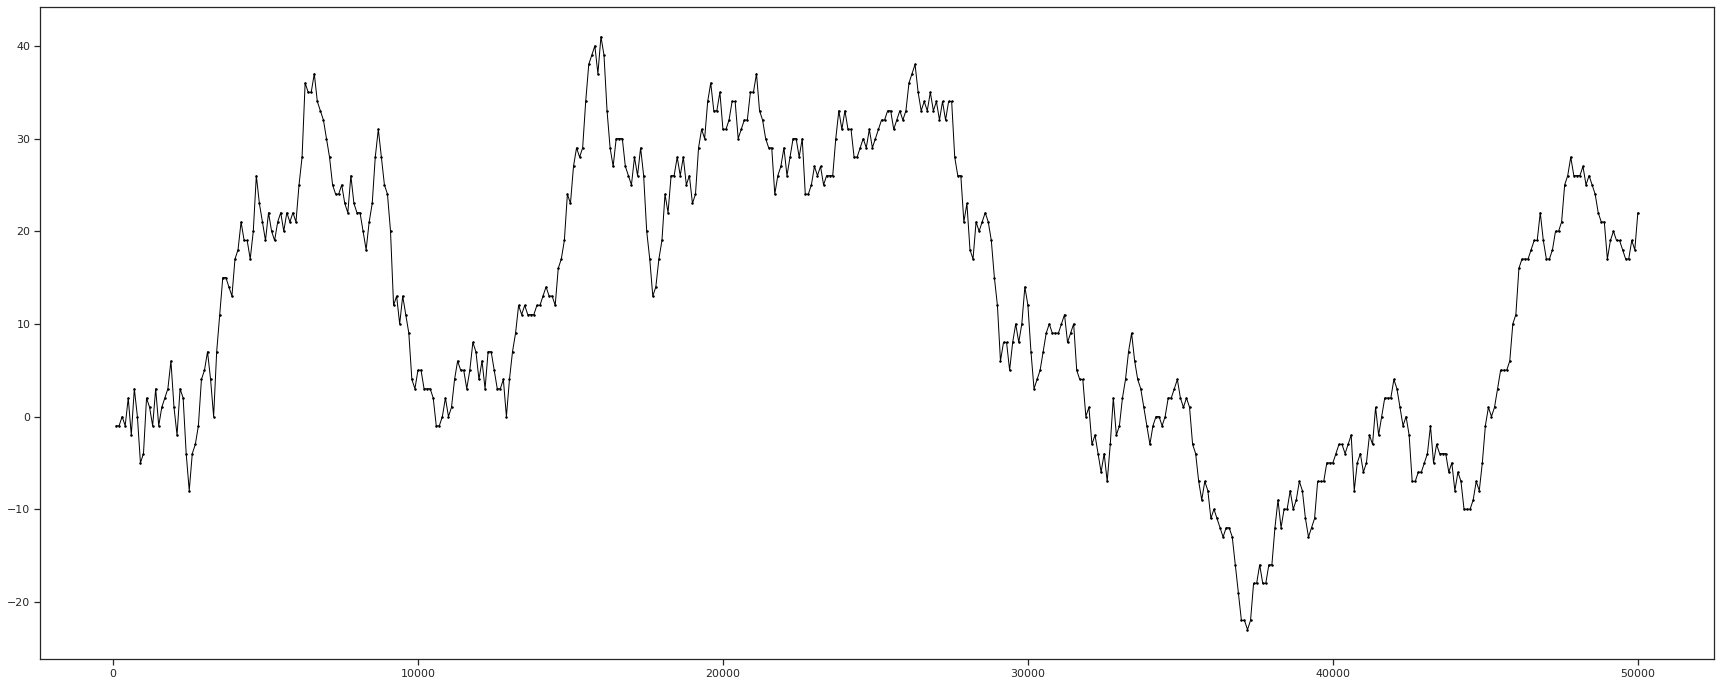

In [140]:
plot(pred_1 = predEdgesDF_1, pred_2 = predEdgesDF_2, maxk = 50000, step_len = 100)

In [104]:
num = np.arange(0,50000+100,100)

In [278]:
df = pd.DataFrame()
df['num']=num
df['non_filter']=1
df['filter']=2
df['multiply']=3
df['score']=4

In [279]:
df

,num,non_filter,filter,multiply,score
0,0,1,2,3,4
1,100,1,2,3,4
2,200,1,2,3,4
3,300,1,2,3,4
4,400,1,2,3,4
...,...,...,...,...,...
496,49600,1,2,3,4
497,49700,1,2,3,4
498,49800,1,2,3,4
499,49900,1,2,3,4


In [280]:
for i in range(0,501):
    df.iloc[i,1] = num_topk(predEdgesDF = predEdgesDF_1, k = (i+1)*100)
    df.iloc[i,2] = num_topk(predEdgesDF = predEdgesDF_2, k = (i+1)*100)
    df.iloc[i,3] = num_topk(predEdgesDF = predEdgesDF_3, k = (i+1)*100)
    df.iloc[i,4] = num_topk(predEdgesDF = predEdgesDF_4, k = (i+1)*100)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [281]:
df

,num,non_filter,filter,multiply,score
0,0,3,3,3,2
1,100,7,6,4,7
2,200,15,10,15,17
3,300,18,14,20,20
4,400,20,16,27,28
...,...,...,...,...,...
496,49600,1707,1777,1840,1830
497,49700,1711,1780,1844,1833
498,49800,1713,1783,1844,1834
499,49900,1714,1786,1847,1839


In [282]:
df.to_csv(path_or_buf = "/gpfs/gibbs/pi/zhao/zc354/GRN/output/topk_bmmc_linkpeaks.csv",sep=str(','))